# Assignment 3: Decision Tree and Random Forest {-}

This assignment aims at familiarizing you with training and testing Decision Tree and Random Forest classification model. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Check if the data is imbalanced, possibly apply SMOTE to oversample or undersample data classes.
- Use GridSearchCV to find the best Decision Tree and Random Forest.
- Show the most important features.
- Visualize the tree.


The dataset you will be working on is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment3 (e.g., ML4DS-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [ ]:
# Load the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv("data-employee-recruitment.csv")

In [ ]:
# Show several data samples
df.head()

enrollee_id  city_development_index  gender      relevent_experience  \
0        14569                   0.704    Male  Has relevent experience   
1        10557                   0.594  Female  Has relevent experience   
2        14095                   0.596    Male  Has relevent experience   
3        16300                   0.614    Male  Has relevent experience   
4        14550                   0.534    Male   No relevent experience   

  enrolled_university education_level major_discipline experience  \
0    Full time course        Graduate             STEM          2   
1    Full time course         Masters             STEM          9   
2    Part time course        Graduate       Humanities          2   
3    Full time course         Masters             STEM          4   
4    Full time course        Graduate             STEM         <1   

  company_size         company_type last_new_job  training_hours  target  
0        50-99              Pvt Ltd            2              71     1.0  
1        50-99  Early Stage Startup        never             217     1.0  
2      100-500              Pvt Ltd            2              12     1.0  
3        50-99              Pvt Ltd            1              20     1.0  
4        50-99  Early Stage Startup            1              52     1.0

A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

In [ ]:
# Shape of data frame
print("Data shape: " + str(df.shape) + "\n")     

Data shape: (2135, 13)



In [ ]:
# Create a copy of the data frame
data = df.copy()

In [ ]:
# Drop the enrollee_id column
data.drop(columns=['enrollee_id'], inplace=True)
data

city_development_index  gender      relevent_experience  \
0                      0.704    Male  Has relevent experience   
1                      0.594  Female  Has relevent experience   
2                      0.596    Male  Has relevent experience   
3                      0.614    Male  Has relevent experience   
4                      0.534    Male   No relevent experience   
...                      ...     ...                      ...   
2130                   0.698  Female   No relevent experience   
2131                   0.920    Male   No relevent experience   
2132                   0.926    Male  Has relevent experience   
2133                   0.895    Male  Has relevent experience   
2134                   0.624    Male   No relevent experience   

     enrolled_university education_level major_discipline experience  \
0       Full time course        Graduate             STEM          2   
1       Full time course         Masters             STEM          9   
2       Part time course        Graduate       Humanities          2   
3       Full time course         Masters             STEM          4   
4       Full time course        Graduate             STEM         <1   
...                  ...             ...              ...        ...   
2130    Part time course        Graduate            Other          3   
2131    Full time course        Graduate             STEM          3   
2132    Full time course         Masters             STEM         19   
2133    Part time course         Masters            Other        >20   
2134    Full time course        Graduate             STEM          1   

     company_size         company_type last_new_job  training_hours  target  
0           50-99              Pvt Ltd            2              71     1.0  
1           50-99  Early Stage Startup        never             217     1.0  
2         100-500              Pvt Ltd            2              12     1.0  
3           50-99              Pvt Ltd            1              20     1.0  
4           50-99  Early Stage Startup            1              52     1.0  
...           ...                  ...          ...             ...     ...  
2130        10/49       Funded Startup            1              14     0.0  
2131       10000+                  NGO            1              94     0.0  
2132        50-99              Pvt Ltd            4              27     0.0  
2133    1000-4999              Pvt Ltd           >4              18     0.0  
2134      100-500              Pvt Ltd            1              52     1.0  

[2135 rows x 12 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2135 non-null   float64
 1   gender                  2135 non-null   object 
 2   relevent_experience     2135 non-null   object 
 3   enrolled_university     2135 non-null   object 
 4   education_level         2135 non-null   object 
 5   major_discipline        2135 non-null   object 
 6   experience              2135 non-null   object 
 7   company_size            2135 non-null   object 
 8   company_type            2135 non-null   object 
 9   last_new_job            2135 non-null   object 
 10  training_hours          2135 non-null   int64  
 11  target                  2135 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 200.3+ KB


In [ ]:
# Check for the missing values
df.isnull().values.any()

False

In [ ]:
# Check for the duplicated values
df.duplicated().sum()

0

In [ ]:
# Get the values of each categorical feature
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
for col in cat_cols:
    print(col + ":", data[col].unique())

gender: ['Male' 'Female']
relevent_experience: ['Has relevent experience' 'No relevent experience']
enrolled_university: ['Full time course' 'Part time course']
education_level: ['Graduate' 'Masters' 'Phd']
major_discipline: ['STEM' 'Humanities' 'Other' 'No Major' 'Business Degree' 'Arts']
experience: ['2' '9' '4' '<1' '5' '3' '11' '10' '7' '12' '1' '16' '15' '8' '13' '17'
 '>20' '6' '19' '14' '18' '20']
company_size: ['50-99' '100-500' '<10' '10000+' '1000-4999' '10/49' '500-999'
 '5000-9999']
company_type: ['Pvt Ltd' 'Early Stage Startup' 'Funded Startup' 'NGO' 'Public Sector'
 'Other']
last_new_job: ['2' 'never' '1' '4' '3' '>4']


In [ ]:
# Transform the experience and last_new_job to numerical features
data.replace(['<1', 'never'], 0, inplace = True)
data.replace('>20', 21, inplace = True)
data.replace('>4', 5, inplace = True)

data['experience'] = data['experience'].astype(int)
data['last_new_job'] = data['last_new_job'].astype(int)

In [ ]:
# Transform the company_size and education_level to numerical features
data['company_size'] = data['company_size'].map({'<10': 0, '10/49': 1, '50-99': 2, '100-500': 3, '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7})
data['education_level'] = data['education_level'].map({'Graduate': 0, 'Masters': 1, 'Phd': 2})

In [ ]:
# Transform the rest categorical features to numerical by One-Hot Encoding
data = pd.get_dummies(data)

In [ ]:
data.drop(columns=['gender_Male', 'relevent_experience_No relevent experience', 'enrolled_university_Part time course'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       2135 non-null   float64
 1   education_level                              2135 non-null   int64  
 2   experience                                   2135 non-null   int64  
 3   company_size                                 2135 non-null   int64  
 4   last_new_job                                 2135 non-null   int64  
 5   training_hours                               2135 non-null   int64  
 6   target                                       2135 non-null   float64
 7   gender_Female                                2135 non-null   uint8  
 8   gender_Male                                  2135 non-null   uint8  
 9   relevent_experience_Has relevent experience  2135 non-null   uint8  
 10  

In [ ]:
data

city_development_index  education_level  experience  company_size  \
0                      0.704                0           2             2   
1                      0.594                1           9             2   
2                      0.596                0           2             3   
3                      0.614                1           4             2   
4                      0.534                0           0             2   
...                      ...              ...         ...           ...   
2130                   0.698                0           3             1   
2131                   0.920                0           3             7   
2132                   0.926                1          19             2   
2133                   0.895                1          21             5   
2134                   0.624                0           1             3   

      last_new_job  training_hours  target  gender_Female  gender_Male  \
0                2              71     1.0              0            1   
1                0             217     1.0              1            0   
2                2              12     1.0              0            1   
3                1              20     1.0              0            1   
4                1              52     1.0              0            1   
...            ...             ...     ...            ...          ...   
2130             1              14     0.0              1            0   
2131             1              94     0.0              0            1   
2132             4              27     0.0              0            1   
2133             5              18     0.0              0            1   
2134             1              52     1.0              0            1   

      relevent_experience_Has relevent experience  ...  \
0                                               1  ...   
1                                               1  ...   
2                                               1  ...   
3                                               1  ...   
4                                               0  ...   
...                                           ...  ...   
2130                                            0  ...   
2131                                            0  ...   
2132                                            1  ...   
2133                                            1  ...   
2134                                            0  ...   

      major_discipline_Humanities  major_discipline_No Major  \
0                               0                          0   
1                               0                          0   
2                               1                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
2130                            0                          0   
2131                            0                          0   
2132                            0                          0   
2133                            0                          0   
2134                            0                          0   

      major_discipline_Other  major_discipline_STEM  \
0                          0                      1   
1                          0                      1   
2                          0                      0   
3                          0                      1   
4                          0                      1   
...                      ...                    ...   
2130                       1                      0   
2131                       0                      1   
2132                       0                      1   
2133                       1                      0   
2134                       0                      1   

      company_type_Early Stage Startup  company_type_Funded Startup  \
0                 

In [ ]:
data = data.rename(columns= {'gender_Female': 'gender', 'relevent_experience_Has relevent experience': 'relevent_experience', 'enrolled_university_Full time course': 'enrolled_university'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       2135 non-null   float64
 1   education_level                              2135 non-null   int64  
 2   experience                                   2135 non-null   int64  
 3   company_size                                 2135 non-null   int64  
 4   last_new_job                                 2135 non-null   int64  
 5   training_hours                               2135 non-null   int64  
 6   target                                       2135 non-null   float64
 7   gender_Female                                2135 non-null   uint8  
 8   gender_Male                                  2135 non-null   uint8  
 9   relevent_experience_Has relevent experience  2135 non-null   uint8  
 10  

In [ ]:
data

city_development_index  education_level  experience  company_size  \
0                      0.704                0           2             2   
1                      0.594                1           9             2   
2                      0.596                0           2             3   
3                      0.614                1           4             2   
4                      0.534                0           0             2   
...                      ...              ...         ...           ...   
2130                   0.698                0           3             1   
2131                   0.920                0           3             7   
2132                   0.926                1          19             2   
2133                   0.895                1          21             5   
2134                   0.624                0           1             3   

      last_new_job  training_hours  target  gender  gender_Male  \
0                2              71     1.0       0            1   
1                0             217     1.0       1            0   
2                2              12     1.0       0            1   
3                1              20     1.0       0            1   
4                1              52     1.0       0            1   
...            ...             ...     ...     ...          ...   
2130             1              14     0.0       1            0   
2131             1              94     0.0       0            1   
2132             4              27     0.0       0            1   
2133             5              18     0.0       0            1   
2134             1              52     1.0       0            1   

      relevent_experience  relevent_experience_No relevent experience  ...  \
0                       1                                           0  ...   
1                       1                                           0  ...   
2                       1                                           0  ...   
3                       1                                           0  ...   
4                       0                                           1  ...   
...                   ...                                         ...  ...   
2130                    0                                           1  ...   
2131                    0                                           1  ...   
2132                    1                                           0  ...   
2133                    1                                           0  ...   
2134                    0                                           1  ...   

      major_discipline_Business Degree  major_discipline_Humanities  \
0                                    0                            0   
1                                    0                            0   
2                                    0                            1   
3                                    0                            0   
4                                    0                            0   
...                                ...                          ...   
2130                                 0                            0   
2131                                 0                            0   
2132                                 0                            0   
2133                                 0                            0   
2134                                 0                            0   

      major_discipline_No Major  major_discipline_Other  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
2130                          0                       1   
2131                          0       

### Decision Tree

In [ ]:
# Drop the column 'target' because it is the data label
X = data.drop(columns=['target'])

# Assign data label to to variable 'y'
y = data.target

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [ ]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [4, 5, 6, 7, 8, 9, 10],                           # Maximum depth of the tree
         "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
          "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8],
          "max_leaf_nodes": [8,9,10,11,12,13,14,15,16]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [ ]:
# Run the search on training data samples.
tree_cv = grid_search.fit(X_train, y_train)

In [ ]:
# Show the results of each hyperparameter with 5-fold cross validation
result = pd.DataFrame(tree_cv.cv_results_)
result = result.set_index('params')
result

mean_fit_time  \
params                                                              
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...       0.002784   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...       0.002474   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...       0.002423   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...       0.002411   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...       0.002442   
...                                                           ...   
{'criterion': 'entropy', 'max_depth': 10, 'max_...       0.003907   
{'criterion': 'entropy', 'max_depth': 10, 'max_...       0.004159   
{'criterion': 'entropy', 'max_depth': 10, 'max_...       0.003855   
{'criterion': 'entropy', 'max_depth': 10, 'max_...       0.003933   
{'criterion': 'entropy', 'max_depth': 10, 'max_...       0.003719   

                                                    std_fit_time  \
params                                                             
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...      0.000195   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...      0.000061   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...      0.000032   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...      0.000021   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...      0.000070   
...                                                          ...   
{'criterion': 'entropy', 'max_depth': 10, 'max_...      0.000168   
{'criterion': 'entropy', 'max_depth': 10, 'max_...      0.000448   
{'criterion': 'entropy', 'max_depth': 10, 'max_...      0.000167   
{'criterion': 'entropy', 'max_depth': 10, 'max_...      0.000432   
{'criterion': 'entropy', 'max_depth': 10, 'max_...      0.000116   

                                                    mean_score_time  \
params                                                                
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.000694   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.000490   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.000514   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.000501   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.000463   
...                                                             ...   
{'criterion': 'entropy', 'max_depth': 10, 'max_...         0.000654   
{'criterion': 'entropy', 'max_depth': 10, 'max_...         0.000602   
{'criterion': 'entropy', 'max_depth': 10, 'max_...         0.000547   
{'criterion': 'entropy', 'max_depth': 10, 'max_...         0.000616   
{'criterion': 'entropy', 'max_depth': 10, 'max_...         0.000509   

                                                    std_score_time  \
params                                                               
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...        0.000160   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...        0.000037   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...        0.000038   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...        0.000075   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...        0.000019   
...                                                            ...   
{'criterion': 'entropy', 'max_depth': 10, 'max_...        0.000071   
{'criterion': 'entropy', 'max_depth': 10, 'max_...        0.000019   
{'criterion': 'entropy', 'max_depth': 10, 'max_...        0.000015   
{'criterion': 'entropy', 'max_depth': 10, 'max_...        0.000130   
{'criterion': 'entropy', 'max_depth': 10, 'max_...        0.000015   

                                                   param_criterion  \
params                                                               
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...            gini   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...            gini   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...            gini   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...            gini   
{'criterion': 

In [ ]:
# Ranking the score of each hyperparameter var_smoothing to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

mean_test_score  \
params                                                                
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...         0.848349   
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...         0.848349   
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...         0.848349   
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...         0.848349   
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...         0.848349   
...                                                             ...   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.817906   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.817906   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.817906   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.817906   
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...         0.817906   

                                                    rank_test_score  
params                                                               
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...                1  
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...                1  
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...                1  
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...                1  
{'criterion': 'gini', 'max_depth': 7, 'max_leaf...                1  
...                                                             ...  
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...             6154  
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...             6154  
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...             6154  
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...             6154  
{'criterion': 'gini', 'max_depth': 4, 'max_leaf...             6154  

[6174 rows x 2 columns]

In [ ]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'], max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'], min_samples_split= grid_search.best_params_['min_samples_split'])

In [ ]:
# Train the decision tree model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=16, min_samples_leaf=3)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples

              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       199
         1.0       0.79      0.88      0.83       228

    accuracy                           0.81       427
   macro avg       0.81      0.80      0.80       427
weighted avg       0.81      0.81      0.81       427



### Random Forest

In [ ]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on training data samples.
forest_cv = grid_search_rf.fit(X_train, y_train)     # Train the RandomForest

In [ ]:
# Show the results of each hyperparameter with 5-fold cross validation
result = pd.DataFrame(forest_cv.cv_results_)
result = result.set_index('params')

# Ranking the score of each hyperparameter var_smoothing to choose the best one
result[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

mean_test_score  \
params                                                                
{'criterion': 'gini', 'max_depth': 11, 'min_sam...         0.860656   
{'criterion': 'entropy', 'max_depth': 11, 'min_...         0.851863   
{'criterion': 'entropy', 'max_depth': 11, 'min_...         0.850116   
{'criterion': 'gini', 'max_depth': 11, 'min_sam...         0.849536   
{'criterion': 'entropy', 'max_depth': 9, 'min_s...         0.849521   
{'criterion': 'gini', 'max_depth': 9, 'min_samp...         0.848941   
{'criterion': 'entropy', 'max_depth': 11, 'min_...         0.847197   
{'criterion': 'gini', 'max_depth': 9, 'min_samp...         0.846012   
{'criterion': 'entropy', 'max_depth': 9, 'min_s...         0.843678   
{'criterion': 'gini', 'max_depth': 11, 'min_sam...         0.841920   
{'criterion': 'gini', 'max_depth': 9, 'min_samp...         0.841910   
{'criterion': 'entropy', 'max_depth': 9, 'min_s...         0.840149   
{'criterion': 'gini', 'max_depth': 7, 'min_samp...         0.838392   
{'criterion': 'entropy', 'max_depth': 7, 'min_s...         0.837808   
{'criterion': 'gini', 'max_depth': 7, 'min_samp...         0.836643   
{'criterion': 'gini', 'max_depth': 7, 'min_samp...         0.833721   
{'criterion': 'entropy', 'max_depth': 7, 'min_s...         0.831378   
{'criterion': 'entropy', 'max_depth': 7, 'min_s...         0.823754   

                                                    rank_test_score  
params                                                               
{'criterion': 'gini', 'max_depth': 11, 'min_sam...                1  
{'criterion': 'entropy', 'max_depth': 11, 'min_...                2  
{'criterion': 'entropy', 'max_depth': 11, 'min_...                3  
{'criterion': 'gini', 'max_depth': 11, 'min_sam...                4  
{'criterion': 'entropy', 'max_depth': 9, 'min_s...                5  
{'criterion': 'gini', 'max_depth': 9, 'min_samp...                6  
{'criterion': 'entropy', 'max_depth': 11, 'min_...                7  
{'criterion': 'gini', 'max_depth': 9, 'min_samp...                8  
{'criterion': 'entropy', 'max_depth': 9, 'min_s...                9  
{'criterion': 'gini', 'max_depth': 11, 'min_sam...               10  
{'criterion': 'gini', 'max_depth': 9, 'min_samp...               11  
{'criterion': 'entropy', 'max_depth': 9, 'min_s...               12  
{'criterion': 'gini', 'max_depth': 7, 'min_samp...               13  
{'criterion': 'entropy', 'max_depth': 7, 'min_s...               14  
{'criterion': 'gini', 'max_depth': 7, 'min_samp...               15  
{'criterion': 'gini', 'max_depth': 7, 'min_samp...               16  
{'criterion': 'entropy', 'max_depth': 7, 'min_s...               17  
{'criterion': 'entropy', 'max_depth': 7, 'min_s...               18

In [ ]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}

In [ ]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=100, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [ ]:
# Train the Random Forest model
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_split=8, random_state=1)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       199
         1.0       0.88      0.88      0.88       228

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



## Feature Importance

### Gini

In [ ]:
# Print the importance level of each feature using gini
weights = model_dt.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

city_development_index                        0.864943
education_level                               0.000000
experience                                    0.052404
company_size                                  0.018229
last_new_job                                  0.043088
training_hours                                0.000000
gender                                        0.000000
gender_Male                                   0.000000
relevent_experience                           0.000000
relevent_experience_No relevent experience    0.000000
enrolled_university                           0.000000
enrolled_university_Part time course          0.000000
major_discipline_Arts                         0.000000
major_discipline_Business Degree              0.000000
major_discipline_Humanities                   0.000000
major_discipline_No Major                     0.000000
major_discipline_Other                        0.000000
major_discipline_STEM                         0.000000
company_ty

In [ ]:
# Five most important features 
feature_importances.nlargest(5)

city_development_index    0.864943
experience                0.052404
last_new_job              0.043088
company_type_Other        0.021336
company_size              0.018229
dtype: float64

### Entropy

In [ ]:
# Build a classification tree based on Entropy
model_dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'], max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'], min_samples_split= grid_search.best_params_['min_samples_split'])
model_dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=16,
                       min_samples_leaf=3)

In [ ]:
# Print the importance level of each feature using Entropy
weights = model_dt_entropy.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances_entropy = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

city_development_index                        0.864943
education_level                               0.000000
experience                                    0.052404
company_size                                  0.018229
last_new_job                                  0.043088
training_hours                                0.000000
gender                                        0.000000
gender_Male                                   0.000000
relevent_experience                           0.000000
relevent_experience_No relevent experience    0.000000
enrolled_university                           0.000000
enrolled_university_Part time course          0.000000
major_discipline_Arts                         0.000000
major_discipline_Business Degree              0.000000
major_discipline_Humanities                   0.000000
major_discipline_No Major                     0.000000
major_discipline_Other                        0.000000
major_discipline_STEM                         0.000000
company_ty

In [ ]:
# Five most important features 
feature_importances_entropy.nlargest(5)

city_development_index    0.834930
experience                0.077682
last_new_job              0.056865
company_type_Other        0.018345
company_size              0.012178
dtype: float64

## Visualize

### Classification Tree using gini

In [ ]:
# Visualize the tree
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

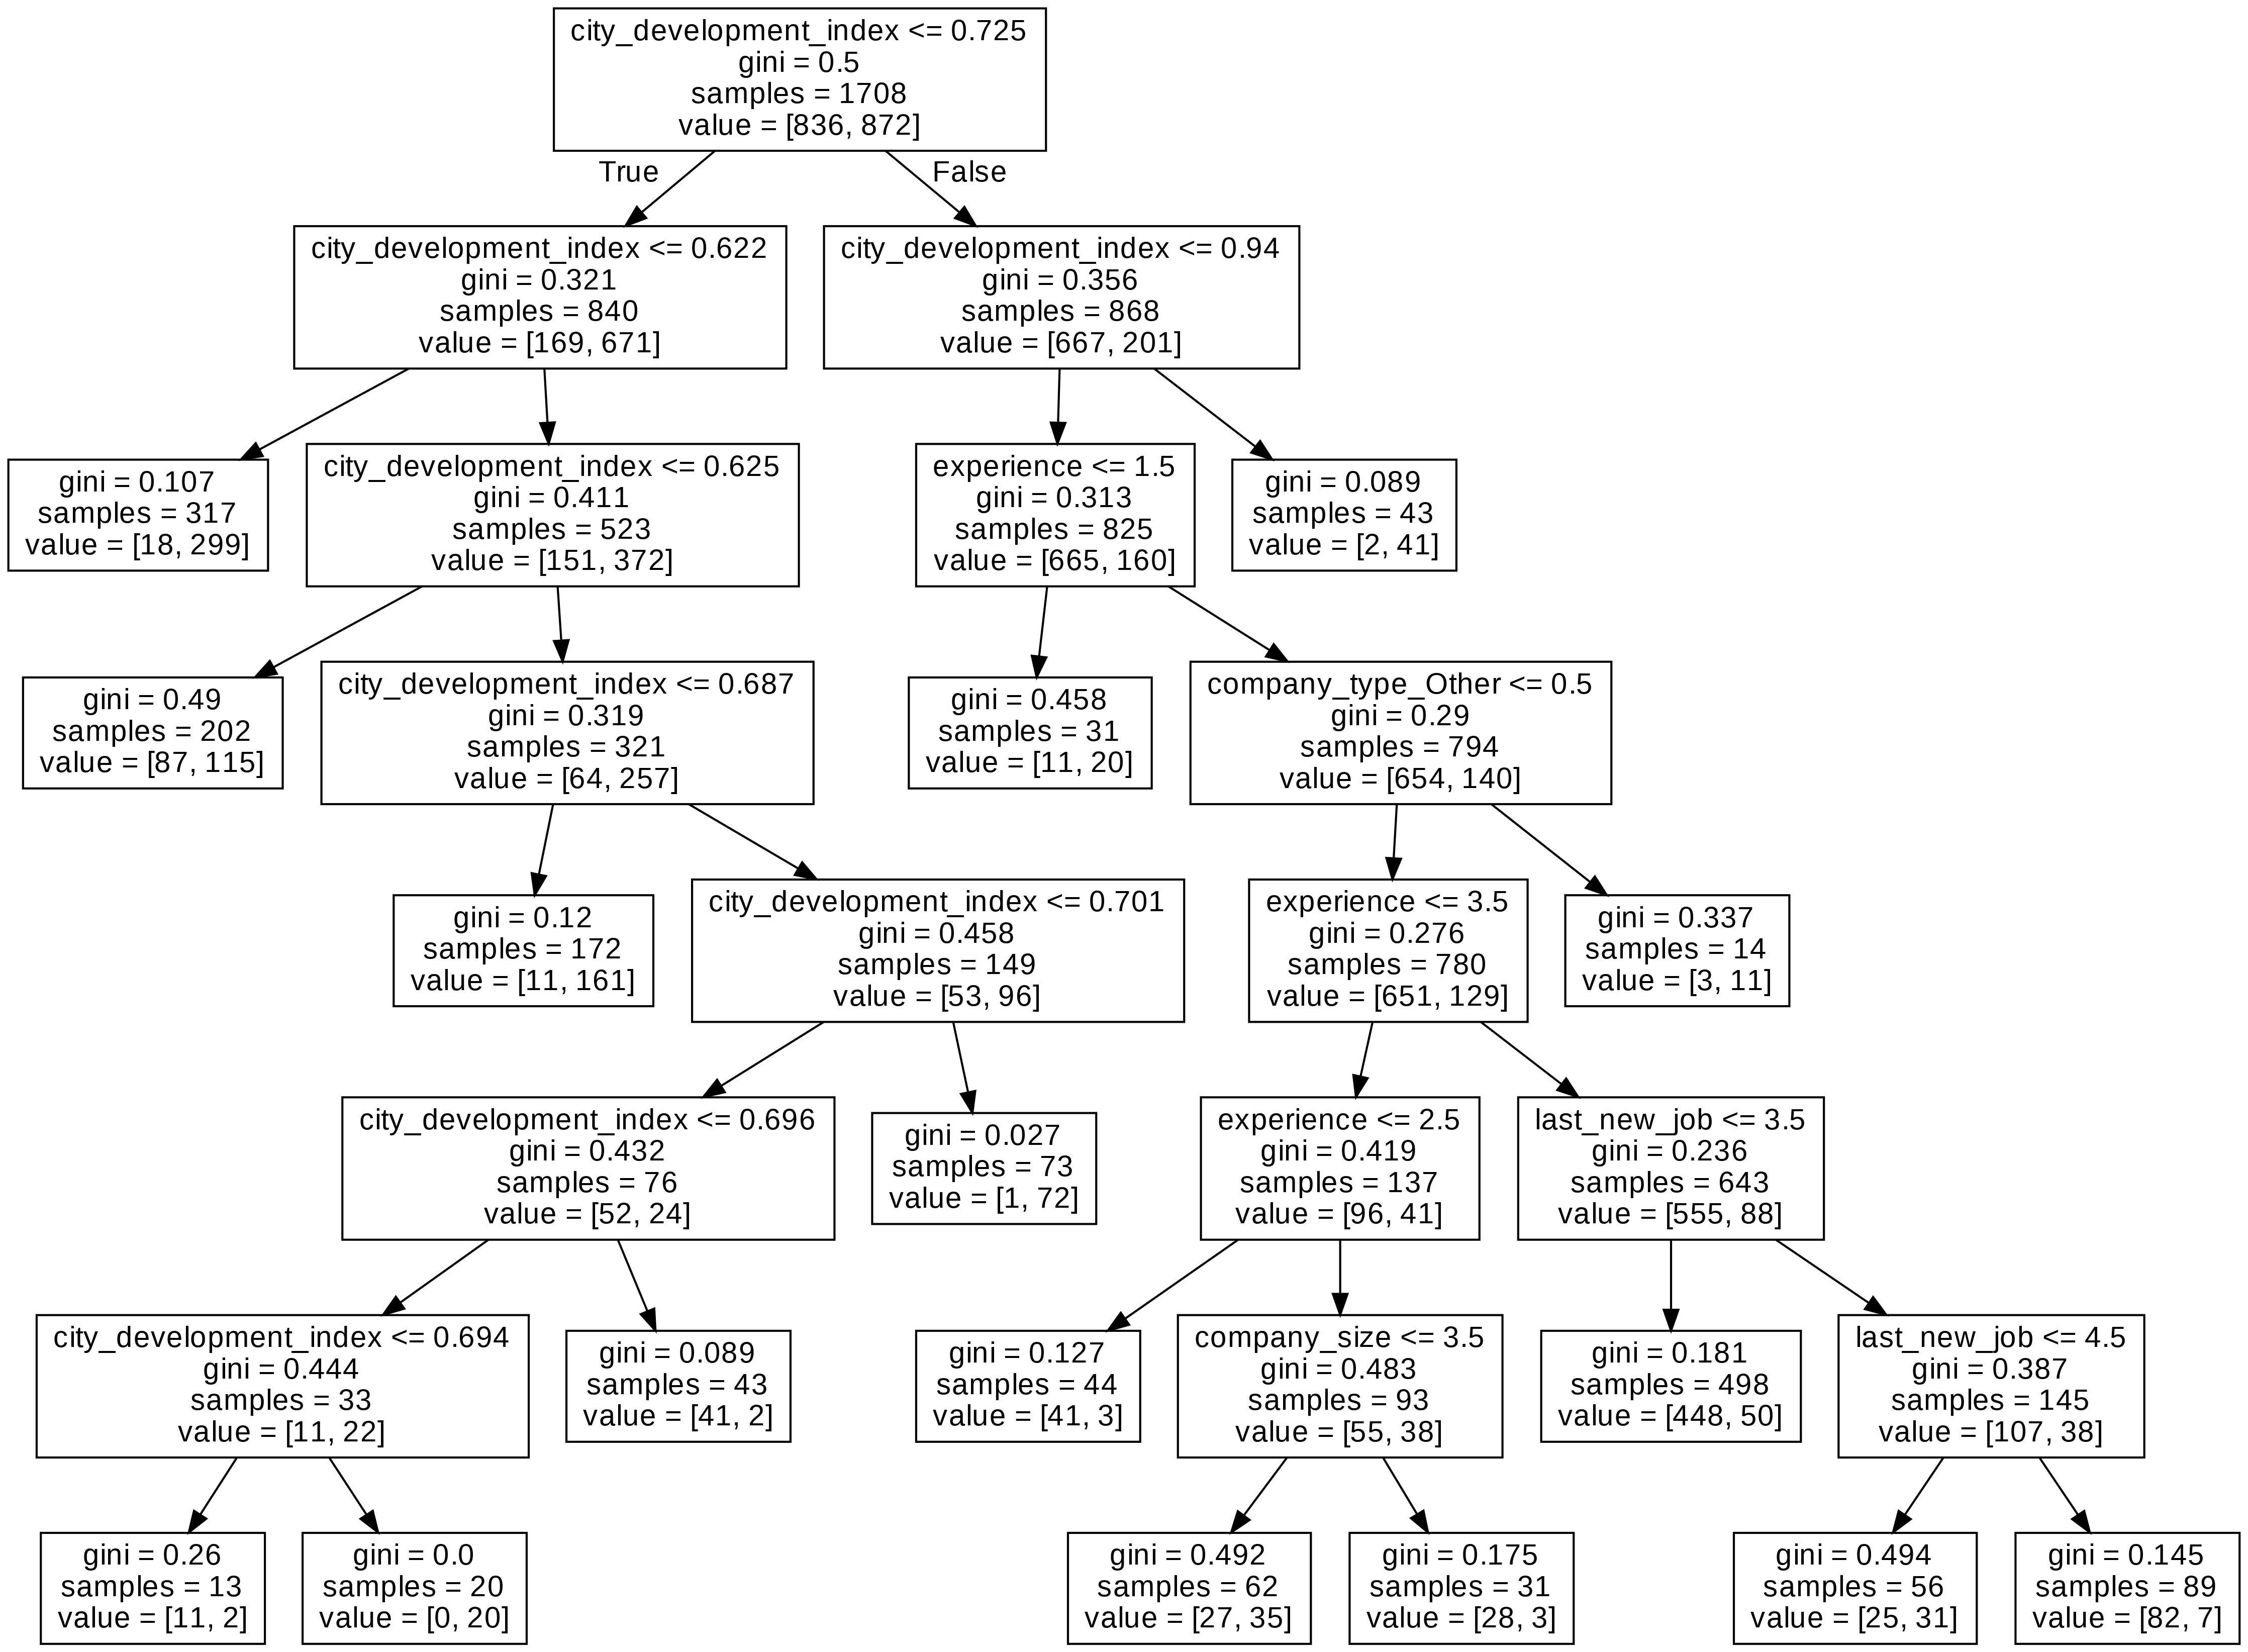

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'

## Classification Tree using entropy

In [ ]:
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt_entropy, out_file='classification-tree-entropy.dot', feature_names=X.columns)     # Save model as 'classification-tree-entropy.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-entropy.dot', '-o', 'classification-tree-entropy.png', '-Gdpi=300'])        # Convert the model to an image

0

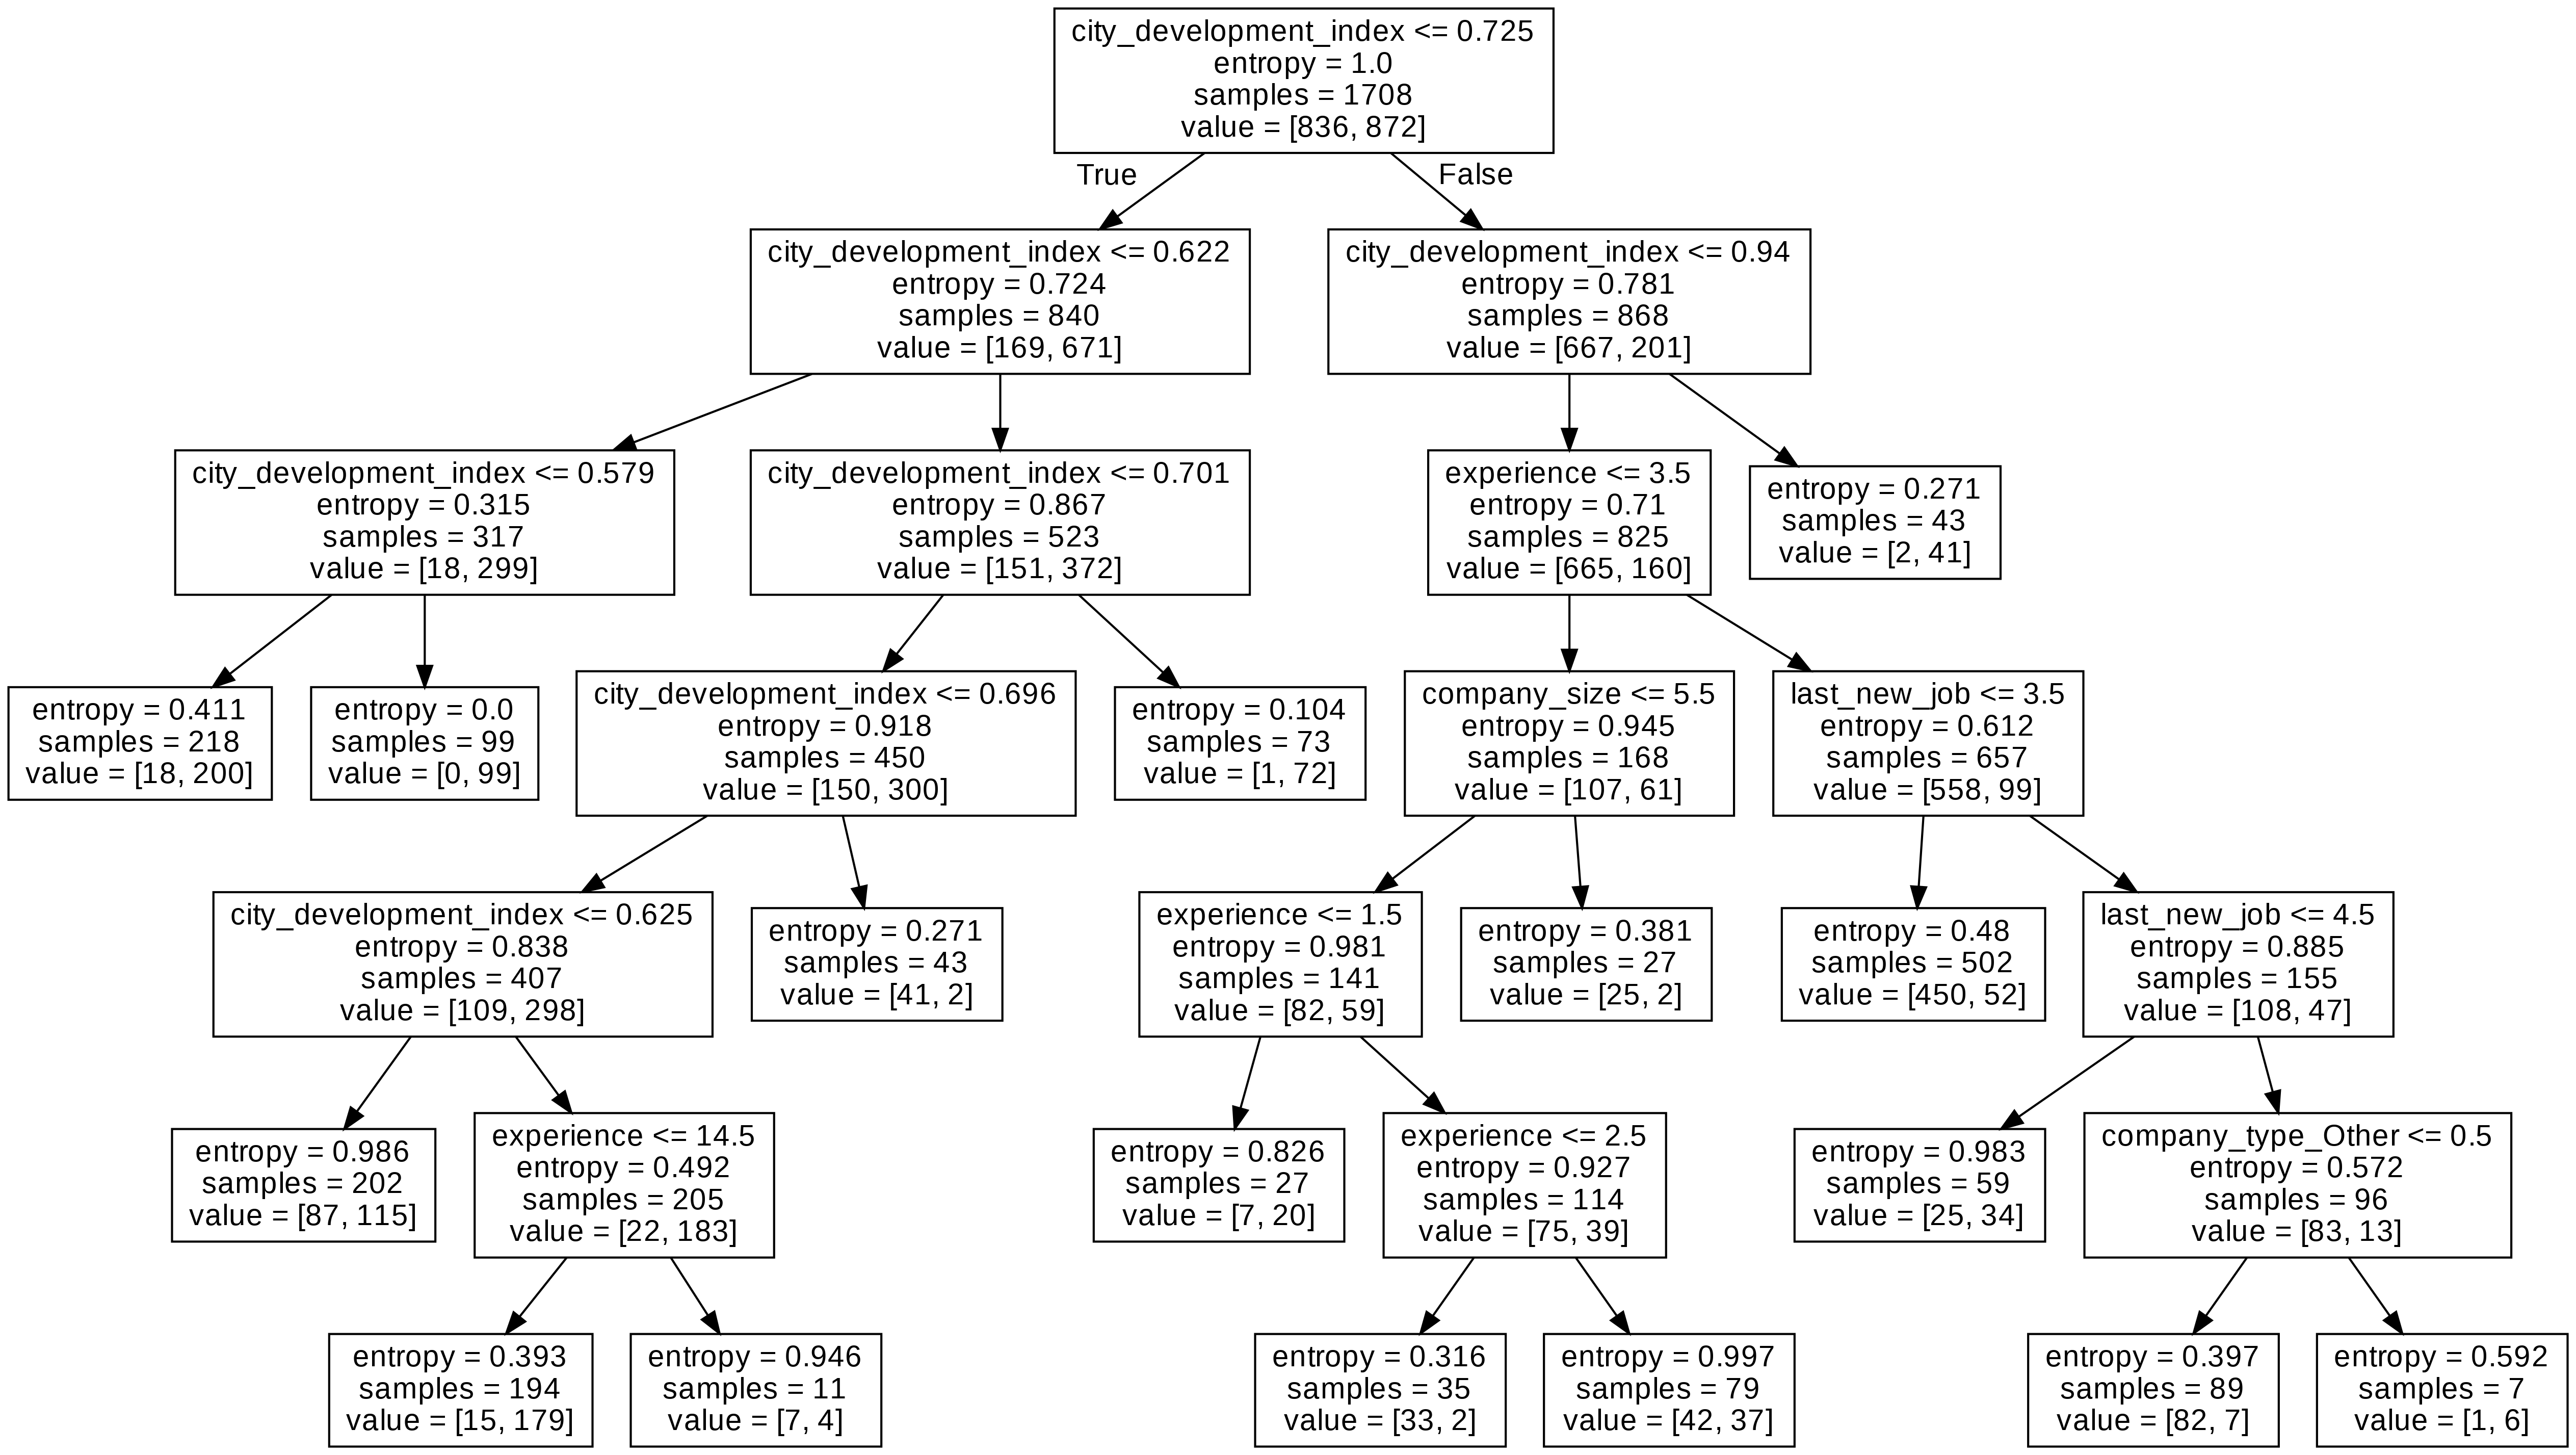

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree-entropy.png')     # Load and display file 'classification-tree.png'

### Regression Tree

In [ ]:
# Initialize regression tree model
model_dt_reg = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
model_dt_reg.fit(X_train, y_train)     

DecisionTreeRegressor(max_depth=7)

In [ ]:
# Visualize the regression tree model
dot_data = tree.export_graphviz(decision_tree=model_dt_reg, out_file='regression-tree.dot', feature_names=X.columns)     # Save model as 'regression-tree.dot'
call(['dot', '-Tpng', 'regression-tree.dot', '-o', 'regression-tree.png', '-Gdpi=300'])         # Convert the model to an image

Image(filename = 'regression-tree.png')     # Load and display file 'regression-tree.png'


# Try using dataset transforming all categorical features to one-hot encoding features

In [ ]:
data2= df.copy()  

In [ ]:
data2.replace(['<1', 'never'], 0, inplace = True)
data2.replace('>20', 21, inplace = True)
data2.replace('>4', 5, inplace = True)

data2['experience'] = data['experience'].astype(float)
data2['last_new_job'] = data['last_new_job'].astype(float)

In [ ]:
data2 = pd.get_dummies(data2)
data2

enrollee_id  city_development_index  experience  last_new_job  \
0           14569                   0.704         2.0           2.0   
1           10557                   0.594         9.0           0.0   
2           14095                   0.596         2.0           2.0   
3           16300                   0.614         4.0           1.0   
4           14550                   0.534         0.0           1.0   
...           ...                     ...         ...           ...   
2130        33060                   0.698         3.0           1.0   
2131        28729                   0.920         3.0           1.0   
2132        11669                   0.926        19.0           4.0   
2133        32932                   0.895        21.0           5.0   
2134        21319                   0.624         1.0           1.0   

      training_hours  target  gender_Female  gender_Male  \
0                 71     1.0              0            1   
1                217     1.0              1            0   
2                 12     1.0              0            1   
3                 20     1.0              0            1   
4                 52     1.0              0            1   
...              ...     ...            ...          ...   
2130              14     0.0              1            0   
2131              94     0.0              0            1   
2132              27     0.0              0            1   
2133              18     0.0              0            1   
2134              52     1.0              0            1   

      relevent_experience_Has relevent experience  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               0   
...                                           ...   
2130                                            0   
2131                                            0   
2132                                            1   
2133                                            1   
2134                                            0   

      relevent_experience_No relevent experience  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              1   
...                                          ...   
2130                                           1   
2131                                           1   
2132                                           0   
2133                                           0   
2134                                           1   

      enrolled_university_Full time course  ...  company_size_10000+  \
0                                        1  ...                    0   
1                                        1  ...                    0   
2                                        0  ...                    0   
3                                        1  ...                    0   
4                                        1  ...                    0   
...                                    ...  ...                  ...   
2130                                     0  ...                    0   
2131                                     1  ...                    1   
2132                                     1  ...                    0   
2133                                     0  ...                    0   
2134                                     1  ...                    0   

      company_size_50-99  company_size_500-999  company_size_5000-9999  \
0                      1                     0                       0   
1                      1                     0                       0   
2                      0                     0                       0   
3        

In [ ]:
# Drop the column 'target' because it is the data label
X = data2.drop(columns=['target'])

# Assign data label to to variable 'y'
y = data2.target

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [ ]:
# Train the decision tree model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=16, min_samples_leaf=3)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       199
         1.0       0.85      0.85      0.85       228

    accuracy                           0.84       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.84      0.84       427

